In [2]:
# import os
# from ..root_path import p
# os.chdir(os.path.dirname(p))
# print(os.getcwd())

from datetime import datetime


from src.issues import BEDTIME_NEWS
from src.removed import REMOVED_ANNOTAIONS

In [3]:
%config InlineBackend.figure_format='svg'

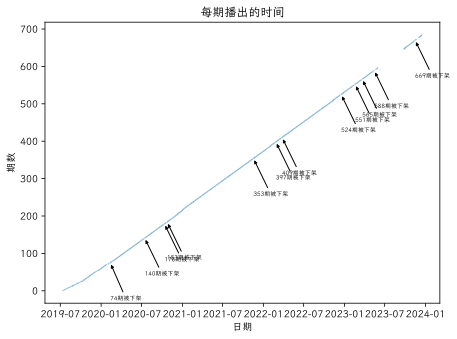

In [7]:
# setup matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams["font.sans-serif"] = ["LXGW WenKai"]
plt.title("每期播出的时间")
plt.xlabel("日期")
plt.ylabel("期数")


plt.scatter(
    x=[datetime.fromtimestamp(issue["created"]) for issue in BEDTIME_NEWS],
    y=[float(issue["issue"]) for issue in BEDTIME_NEWS],
    s=0.02,
)


for y, x in REMOVED_ANNOTAIONS:
    plt.annotate(
        xy=(datetime.fromtimestamp(x), int(y)),
        text=f"{int(y)-1}期被下架",
        xytext=(datetime.fromtimestamp(x), int(y) - 100),
        arrowprops=dict(arrowstyle="-|>", color="k"),
        fontsize=6
    )
    pass

plt.show()

可见，在2023年夏天“放暑假”前，马督工并没有被长时间禁言。

最近他还放了个小寒假，在图上清晰可见，已经无需特别标注了。

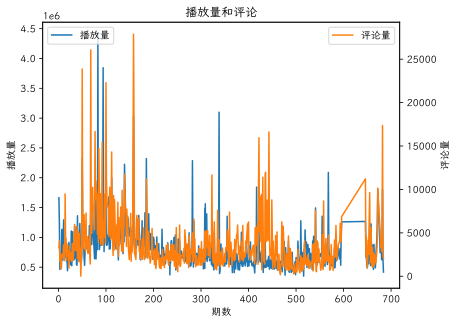

In [16]:
import pandas as pd

fig, ax = plt.subplots()
ax.set_title("播放量和评论")

ax.set_xlabel("期数")
ax.set_ylabel("播放量")

PD_BEDTIME_NEWS = pd.read_json("bedtime_news.json")

ax.plot(
    PD_BEDTIME_NEWS["issue"],
    PD_BEDTIME_NEWS["play"],
    label="播放量",
    color="tab:blue",
    # alpha=0.5,
)

ax2 = ax.twinx()
ax2.set_ylabel("评论量")

ax2.plot(
    PD_BEDTIME_NEWS["issue"],
    PD_BEDTIME_NEWS["comment"],
    label="评论量",
    color="tab:orange",
    # alpha=0.5,
)

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()
# ax.plot(
#     [float(issue["issue"]) for issue in BEDTIME_NEWS],
#     [issue["play"] for issue in BEDTIME_NEWS],
#     label="播放量",
#     color="tab:blue",
# )

唔……没有什么结论。

下面我们分析文本：关注的人物、地区变化趋势。（主题？放弃算了）